**Face Mask Detection System (CNN)**

**This Project is to build a system to detect if or not someone is wearing a facemask using Deel Learning Model(Convolutional Neural Network)**

Data Source:
- https://www.kaggle.com/datasets/omkargurav/face-mask-dataset

Data credit:
- Kaggle 

The Steps in this project include:
+ import dependencies
+ Create Labels for images 
+ Image Processing 
+ Split Data 
+ Train and test Convolutional Neural Network 
+ Build a predictive system 

In [4]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

**Importing the Face Mask Dataset from Kaggle**

In [6]:
# API to fetch the dataset from Kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

face-mask-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [7]:
# extracting the compessed Dataset

from zipfile import ZipFile

dataset = "/content/face-mask-dataset.zip"

with ZipFile(dataset,"r") as zip:
  zip.extractall()
  print("The dataset is extracted successfully")

The dataset is extracted successfully


In [8]:
!ls # TO list directory for all the folders in it. 

data		       kaggle.json  with_mask_test.png
face-mask-dataset.zip  sample_data  without_mask_test.png


**Importing Dependencies**

In [9]:
import os
import numpy as np 
import cv2
from matplotlib import pyplot as plt 
from matplotlib import image as mpimg
from PIL import Image
from google.colab.patches import cv2_imshow # creates image in another window
from sklearn.model_selection import train_test_split
 

In [10]:
# Making a file for the images with mask from the dataset 

with_mask_file = os.listdir("/content/data/with_mask")
without_mask_file = os.listdir("/content/data/without_mask")

In [11]:
print("The total number of images with mask in the dataset is {}".format(len(with_mask_file)))
print("Some of the images are :{}".format(with_mask_file[:3]))
print("The total number of images without mask in the dataset is {}".format(len(without_mask_file)))
print("Some of the images are :{}".format(without_mask_file[:3]))

The total number of images with mask in the dataset is 3725
Some of the images are :['with_mask_3162.jpg', 'with_mask_3570.jpg', 'with_mask_1012.jpg']
The total number of images without mask in the dataset is 3828
Some of the images are :['without_mask_2149.jpg', 'without_mask_186.jpg', 'without_mask_2998.jpg']


**Creating Labels for the images**
- with mask = 1
- without mask = 0

In [12]:
# Assigning the labels (0 and 1)  to the images

with_mask = [1]*len(with_mask_file)
without_mask = [0]*len(without_mask_file)

In [13]:
print(with_mask[:10])
print(without_mask[:10])

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [14]:
# Mergeing the list of labels with and without mask into a variable name (labels)


labels = with_mask + without_mask

print(len(labels))
print(labels[:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


**Displaying Images**

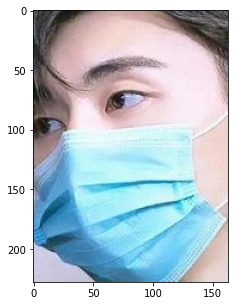

In [15]:

plt.figure(figsize=(10,5))
img_path = "/content/data/with_mask/with_mask_1545.jpg"
img = mpimg.imread(img_path)
plt.imshow(img)
plt.show()

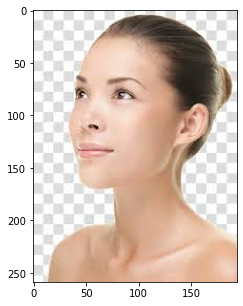

In [16]:
plt.figure(figsize=(10,5))
img_path = "/content/data/without_mask/without_mask_2925.jpg"
img = mpimg.imread(img_path)
plt.imshow(img)
plt.show()

**Image Preprocessing**

- Combining both data together
  + with mask and without mask images
- Resizing the image  
- Converting the image to RGB color
- Converting the image to numpy array
- 

In [17]:
# Data Path 

with_mask_path = "/content/data/with_mask/"
without_mask_path = "/content/data/without_mask/"

# Creating an empty list for the converted images into Numpy array  
data = []

# iterating through the file of images with mask 
for image_file in with_mask_file:
  # concatinating / merging each iteration and the path
  image = Image.open(with_mask_path + image_file )
  # Resizing the image to (128 by 128) size
  image = image.resize((128,128))
  # Converting the image to a RED,GREEn,BlUE Color 
  image = image.convert("RGB")
  # Converting the image into a numpy array 
  image = np.array(image)
  # Appending the result to a variable name "data"
  data.append(image)




# iterating through the file of images without mask 
for image_file in without_mask_file:
  # concatinating / merging each iteration and the path
  image = Image.open(without_mask_path + image_file)
   # Resizing the image to (128 by 128) size
  image = image.resize((128,128))
  # Converting the image to a RED,GREEn,BlUE Color 
  image = image.convert("RGB")
  # Converting the image into a numpy array 
  image = np.array(image) 
   # Appending the result to a variable name "data"
  data.append(image)

/usr/local/lib/python3.9/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [18]:
print(type(data))
print(len(data))
print(data[0].shape)

<class 'list'>
7553
(128, 128, 3)


In [19]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)
print(type(X))
print(type(Y))
print(X.shape)
print(Y.shape)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(7553, 128, 128, 3)
(7553,)


**Splitting the data for training and testing**

In [20]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X, Y, random_state=2, test_size=0.2, shuffle=True, stratify=Y)

In [21]:
print(Xtrain.shape)
print(Ytrain.shape)
print(Xtest.shape)
print(Ytest.shape)

(6042, 128, 128, 3)
(6042,)
(1511, 128, 128, 3)
(1511,)


In [22]:
# Rescalling the training data by (255) to have a uniform scale for the model to perform optimally. 

Xtrain_scaled = Xtrain / 255
Xtest_scaled = Xtest / 255

In [23]:
# Before Scale

Xtrain[0]

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[ 21,  21,  21],
        [  6,   6,   6],
        [ 62,  62,  62],
        ...,
        [ 69,  69,  71],
        [ 62,  62,  64],
        [ 50,  49,  50]],

       [[ 22,  22,  22],
        [  7,   7,   7],
        [ 64,  64,  64],
        ...,
        [113, 113, 115],
        [ 64,  65,  67],
        [ 43,  42,  43]],

       [[ 21,  20,  21],
        [ 45,  44,  44],
        [  1,   0,   0],
        ...,
        [ 35,  35,  37],
        [ 93,  93,  95],
        [ 46,  45,  48]]

In [24]:
# After scale 

Xtrain_scaled[0]

array([[[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       ...,

       [[0.08235294, 0.08235294, 0.08235294],
        [0.02352941, 0.02352941, 0.02352941],
        [0.24313725, 0

Building a Convolutional Neural Networks (CNN)

In [25]:
import tensorflow as tf
from tensorflow import keras

In [26]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [27]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [28]:
# training the neural network

history = model.fit(Xtrain_scaled, Ytrain, validation_split=0.1, epochs=7)

Epoch 1/7
170/170 [==============================] - 14s 23ms/step - loss: 0.4616 - acc: 0.8129 - val_loss: 0.2589 - val_acc: 0.8959
Epoch 2/7
170/170 [==============================] - 3s 18ms/step - loss: 0.2844 - acc: 0.8902 - val_loss: 0.2084 - val_acc: 0.9124
Epoch 3/7
170/170 [==============================] - 3s 17ms/step - loss: 0.2325 - acc: 0.9088 - val_loss: 0.2159 - val_acc: 0.9140
Epoch 4/7
170/170 [==============================] - 3s 17ms/step - loss: 0.2001 - acc: 0.9248 - val_loss: 0.2057 - val_acc: 0.9140
Epoch 5/7
170/170 [==============================] - 3s 17ms/step - loss: 0.1802 - acc: 0.9338 - val_loss: 0.1629 - val_acc: 0.9273
Epoch 6/7
170/170 [==============================] - 3s 19ms/step - loss: 0.1537 - acc: 0.9459 - val_loss: 0.1679 - val_acc: 0.9339
Epoch 7/7
170/170 [==============================] - 3s 17ms/step - loss: 0.1146 - acc: 0.9559 - val_loss: 0.1689 - val_acc: 0.9421


**Model Evaluation**

In [29]:
loss, accuracy = model.evaluate(Xtest_scaled, Ytest)
print('The Test Accuracy = {}'.format(accuracy))

48/48 [==============================] - 0s 9ms/step - loss: 0.2100 - acc: 0.9338
The Test Accuracy = 0.9338186383247375


*Plotting the Model Performance*

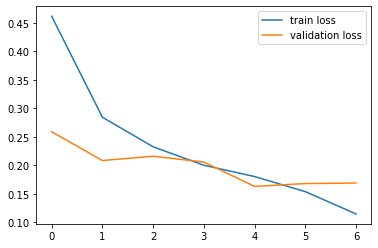

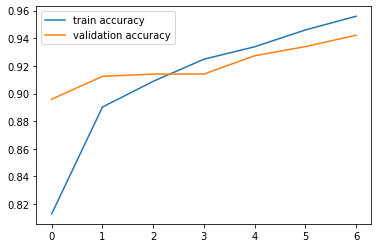

In [30]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

**Predictive System**

In [31]:
def predictive_system (Image_path):

  input_image_path = input('Path of the image to be predicted: ')

  input_image = cv2.imread(input_image_path)

  cv2_imshow(input_image)

  input_image_resized = cv2.resize(input_image, (128,128))

  input_image_scaled = input_image_resized/255

  input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

  input_prediction = model.predict(input_image_reshaped)

  print(input_prediction)


  input_pred_label = np.argmax(input_prediction)

  print(input_pred_label)


  if input_pred_label == 1:

    print('The person in the image is wearing a mask')

  else:

    print('The person in the image is not wearing a mask')

Path of the image to be predicted: /content/with_mask_test.png


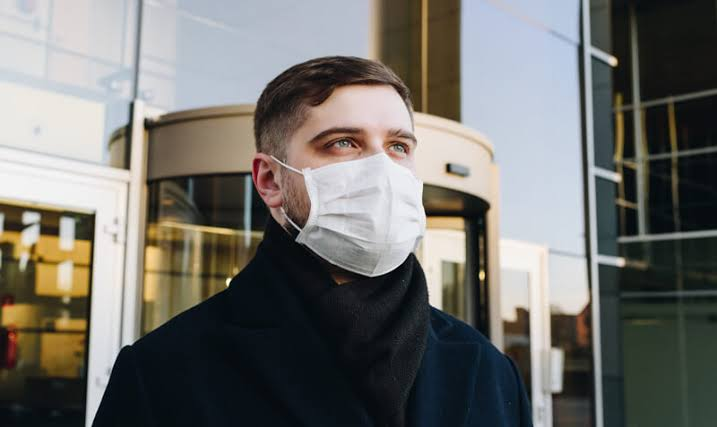

1/1 [==============================] - 0s 35ms/step
[[0.13682383 0.82631874]]
1
The person in the image is wearing a mask


In [33]:
predictive_system(image)

Path of the image to be predicted: /content/without_mask_test.png


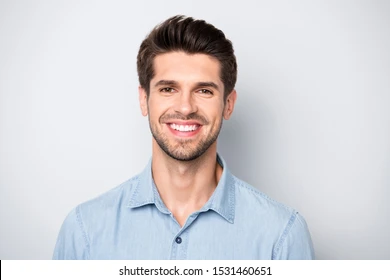

1/1 [==============================] - 0s 21ms/step
[[0.3430286  0.68983227]]
1
The person in the image is wearing a mask


In [34]:
predictive_system(image)

Path of the image to be predicted: /content/data/without_mask/without_mask_1069.jpg


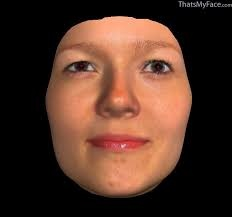

1/1 [==============================] - 0s 23ms/step
[[0.05864592 0.983955  ]]
1
The person in the image is wearing a mask


In [35]:
predictive_system(image)

Path of the image to be predicted: /content/data/without_mask/without_mask_1077.jpg


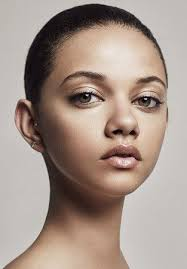

1/1 [==============================] - 0s 39ms/step
[[0.27245685 0.85200703]]
1
The person in the image is wearing a mask


In [36]:
predictive_system(image)

Path of the image to be predicted: /content/passport photo.jfif


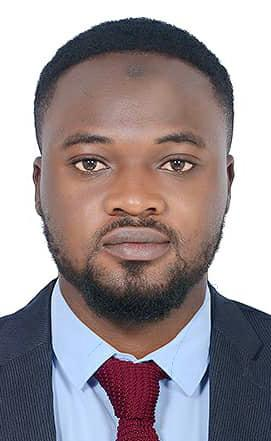

1/1 [==============================] - 0s 41ms/step
[[0.14014739 0.90055466]]
1
The person in the image is wearing a mask


In [38]:
predictive_system(image)

In [39]:
import pickle

In [41]:
pickle.dump(model, open("DL_CNN_Facemask_Model.pkl", "wb"))


Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers
......conv2d
.........vars
............0
............1
......conv2d_1
.........vars
............0
............1
......dense
.........vars
............0
............1
......dense_1
.........vars
............0
............1
......dense_2
.........vars
............0
............1
......dropout
.........vars
......dropout_1
.........vars
......flatten
.........vars
......max_pooling2d
.........vars
......max_pooling2d_1
.........vars
...metrics
......mean
.........vars
............0
............1
......mean_metric_wrapper
.........vars
............0
............1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........13
.........14
.........15
.........16
.........17
.........18
.........19
.........2
.........20
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars
Keras model archive saving:
File Name                                             Mo